In [ ]:
import pandas as pd

df = pd.read_csv("graph.csv")

df

,Node1,Node2,Weight
0,Ani,Budi,3
1,Ani,Cici,2
2,Budi,Cici,1
3,Budi,David,4
4,Cici,Eva,2
5,David,Eva,3
6,Eva,Farhan,1
7,Farhan,Gunawan,2
8,Gunawan,Hendra,3
9,David,Gunawan,2


## Pertanyaan 1

In [ ]:
def degree_centrality(G):
  nodes = dict()

  for index, row in G.iterrows():
    node1 = row["Node1"]
    node2 = row["Node2"]
    if (node1 in nodes):
      nodes[node1] += 1
    else:
      nodes[node1] = 1

    if(node2 in nodes):
      nodes[node2] += 1
    else:
      nodes[node2] = 1

  return nodes

In [ ]:
result = degree_centrality(df)

for key, value in result.items():
  print(f"{key}: {value}")

print()
print("Normalized:")
for key, value in result.items():
  degree_central = value/(len(result.keys()) - 1)
  print(f"{key}: {degree_central}")

Ani: 5
Budi: 5
Cici: 6
David: 8
Eva: 8
Farhan: 5
Gunawan: 8
Hendra: 7
Joko: 8
Kate: 7
Lisa: 7

Normalized:
Ani: 0.5
Budi: 0.5
Cici: 0.6
David: 0.8
Eva: 0.8
Farhan: 0.5
Gunawan: 0.8
Hendra: 0.7
Joko: 0.8
Kate: 0.7
Lisa: 0.7


## Pertanyaan 2

In [ ]:
def count_degree(G):
  indegrees = dict()
  outdegrees = dict()

  nodes = set()

  # Adding all possible nodes to set and then initialize it on dictionary

  for index, row in G.iterrows():
    nodes.add(row["Node1"])
    nodes.add(row["Node2"])

  for item in nodes:
    indegrees[item] = 0
    outdegrees[item] = 0

  for index, row in G.iterrows():
    outdegrees[row["Node1"]] += 1

    indegrees[row["Node2"]] += 1

  return indegrees, outdegrees

In [ ]:
indegrees, outdegrees = count_degree(df)
indegree = dict()
outdegree = dict()

print("Indegrees: ")
for key, value in indegrees.items():
  print(f"{key}: {value}")

print()
print("="*80)

print("Outdegrees: ")
for key, value in outdegrees.items():
  print(f"{key}: {value}")

print()
print("="*80)

print()
print("Indegree Centrality: ")
for key, value in indegrees.items():
  indegree_value = value/(len(indegrees.keys()) - 1)
  indegree[key] = indegree_value
  print(f"{key}: {indegree_value}")

print()
print("Outdegree Centrality: ")
for key, value in outdegrees.items():
  outdegree_value = value/(len(outdegrees.keys()) - 1)
  outdegree[key] = outdegree_value
  print(f"{key}: {outdegree_value}")

print()
print("="*80)

print("Total Degree Centrality: ")

for key in sorted(outdegree.keys()):
  print(f"{key}: {indegree[key] + outdegree[key]}")

Indegrees: 
Ani: 0
Farhan: 1
Eva: 3
Kate: 6
Budi: 1
David: 2
Lisa: 7
Cici: 3
Hendra: 4
Gunawan: 3
Joko: 7

Outdegrees: 
Ani: 5
Farhan: 4
Eva: 5
Kate: 1
Budi: 4
David: 6
Lisa: 0
Cici: 3
Hendra: 3
Gunawan: 5
Joko: 1


Indegree Centrality: 
Ani: 0.0
Farhan: 0.1
Eva: 0.3
Kate: 0.6
Budi: 0.1
David: 0.2
Lisa: 0.7
Cici: 0.3
Hendra: 0.4
Gunawan: 0.3
Joko: 0.7

Outdegree Centrality: 
Ani: 0.5
Farhan: 0.4
Eva: 0.5
Kate: 0.1
Budi: 0.4
David: 0.6
Lisa: 0.0
Cici: 0.3
Hendra: 0.3
Gunawan: 0.5
Joko: 0.1

Total Degree Centrality: 
Ani: 0.5
Budi: 0.5
Cici: 0.6
David: 0.8
Eva: 0.8
Farhan: 0.5
Gunawan: 0.8
Hendra: 0.7
Joko: 0.7999999999999999
Kate: 0.7
Lisa: 0.7


Perhatikan bahwa nilai dari Joko adalah 0.7999999999999999 karena perhitungan 0.7 + 0.1 pada python akan menghasilkan nilai 0.7999999999999999 karena floating point problem.

In [ ]:
print(0.7 + 0.1) # Matematika seharusnya 0.8

0.7999999999999999


## Pertanyaan 3

Asumsikan terdapat arah pada data tersebut, dengan arah dari node1 ke node2
dengan bobot weight. Farhan ingin mengirimkan pesan ke semua temannya, tetapi
ia tidak tahu bagaimana cara yang paling mudah untuk menghubungi seseorang
(asumsikan makin besar weight maka makin sulit dihubungi). Tentukan total weight
terkecil yang dibutuhkan Farhan untuk mengirimkan pesan ke semua temannya,
beserta alurnya! Contoh: Farhan ke Frans: Joko (3) + Gunawan (1) = 4

**Jawaban:**

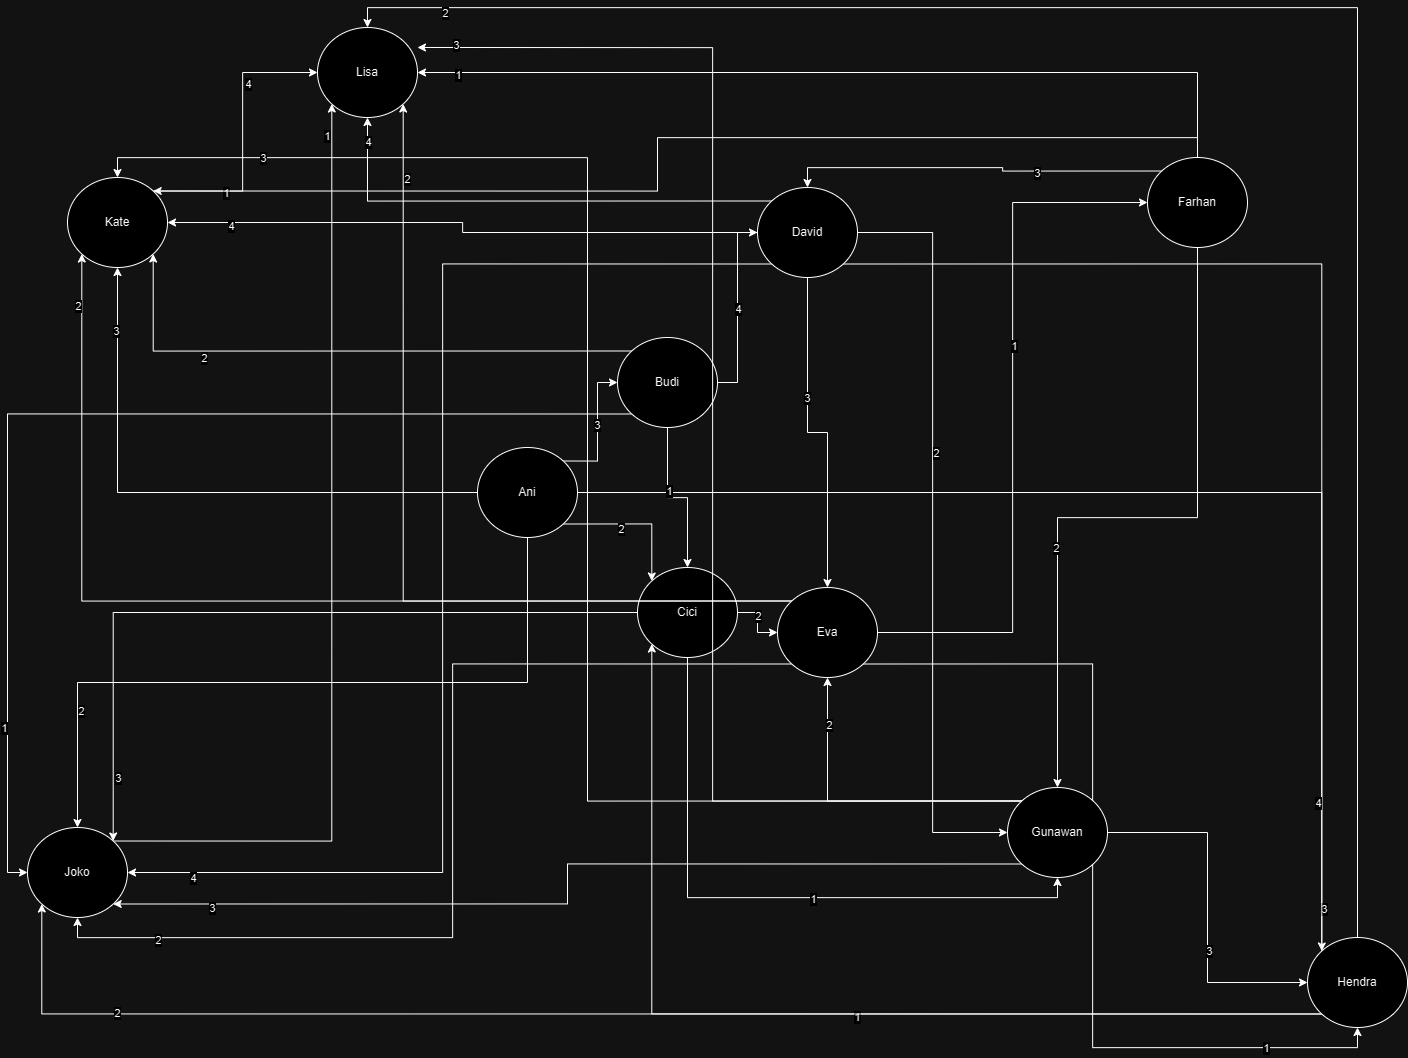

Farhan ke Ani: Tidak bisa (indegree 0 mengimplikasikan tidak ada yang bisa mengkontak Ani).

Farhan ke Budi: Tidak bisa (indegree hanya 1 yaitu dari Ani saja)

Farhan ke Cici: Gunawan (2) + Hendra (3) + Cici (1) = 6

Farhan ke David: David(3) = 3

Farhan ke Eva: Gunawan (2) + Eva (2) = 4

Farhan ke Farhan: 0 karena Farhan merupakan orang itu sendiri.

Farhan ke Gunawan: Gunawan (2) = 2

Farhan ke Hendra: Gunawan (2) + Hendra (3) = 5

Farhan ke Joko: Gunawan (2) + Joko (3) = 5

Farhan ke Kate: Kate (1) = 1

Farhan ke Lisa: Lisa (1) = 1

## Pertanyaan 4

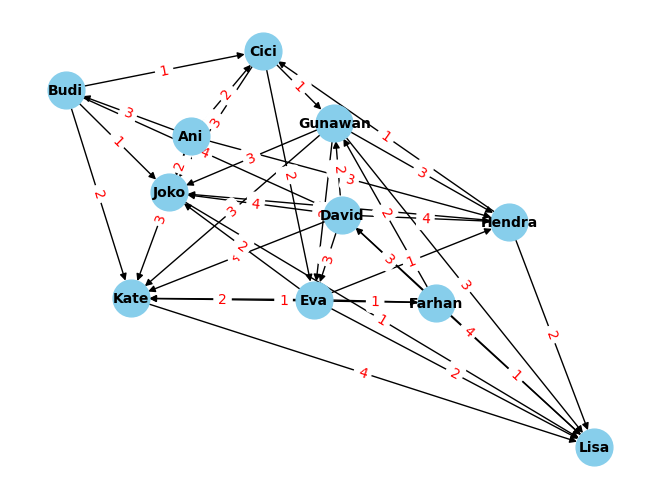

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.from_pandas_edgelist(df, 'Node1', 'Node2', ['Weight'], create_using=nx.DiGraph())

pos = nx.spring_layout(G)

edge_labels = {(i, j): G[i][j]['Weight'] for i, j in G.edges()}

nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_color='black', font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.show()

## Pertanyaan 5

Pola yang ditemui:

Pria - 1 - Pria: 6
  - Budi-1-David
  - Hendra-1-Gunawan
  - Budi-1-Joko
  - Hendra-1-Gunawan
  - David-1-Farhan
  - Joko-1-Budi

Pria - 2 - Pria: 4
  - Joko-2-David
  - Farhan-2-Gunawan
  - Hendra-2-David
  - David-2-Gunawan

Wanita - 2 - Wanita: 4
  - Ani-2-Cici
  - Cici-2-Eva
  - Eva-2-Lisa
  - Kate-2-Eva

Wanita - 1 - Wanita: 1
  - Ani - 1 - Kate

Pria - 1 - Pria - 2 - Pria: 5
  - Budi - 1 - David - 2 - Joko
  - Hendra - 1 - Gunawan - 2 - Farhan
  - Hendra - 1 - Gunawan - 2 - David
  - Farhan - 1 - David - 2 - Hendra
  - Farhan - 1 - David - 2 - Gunawan

Wanita - 1 - Pria: 10
  - Eva - 1 - Farhan
  - Cici - 1 - Budi
  - Ani - 1 - Budi
  - Eva - 1 - Hendra
  - Cici - 1 - Hendra
  - Cici - 1 - Gunawan
  - Kate - 1 - Farhan
  - Kate - 1 - David
  - Lisa - 1 - Gunawan
  - Cici - 1 - Hendra

Wanita - 2 - Pria: 10
  - Lisa - 2 - David
  - Ani - 2 - Budi
  - Ani - 2 - Hendra
  - Ani - 2 - Joko
  - Ani - 2 - Joko
  - Kate - 2 - Budi
  - Kate - 2 - Gunawan
  - Lisa - 2 - David
  - Lisa - 2 - Hendra
  - Eva - 2 - Gunawan

Wanita - 1 - Pria - 2 - Pria: 4
  - Eva - 1 - Farhan - 2 - Gunawan
  - Eva - 1 - Hendra - 2 - David
  - Cici - 1 - Gunawan - 2 - David
  - Cici - 1 - Hendra - 2 - David

Pria - 1 - Wanita - 2 - Wanita: 5
  - Farhan - 1 - Eva - 2 - Lisa
  - Farhan - 1 - Eva - 2 - Cici
  - Budi - 1 - Cici - 2 - Eva
  - Farhan - 1 - Kate - 2 - Eva
  - David - 1 - Kate - 2 - Eva


Wanita - 2 - Pria - 1 - Pria: 6
  - Ani - 2 - Budi - 1 - David
  - Lisa - 2 - David - 1 - Budi
  - Ani - 2 - Joko - 1 - Budi
  - Ani - 2 - Hendra - 1 - Gunawan
  - Ani - 2 - Joko - 1 - Budi
  - Kate - 2 - Budi - 1 - Joko

Wanita - 2 - Pria - 1 - Wanita: 7
  - Ani - 2 - Hendra - 1 - Cici
  - Ani - 2 - Budi - 1 - Cici
  - Ani - 2 - Hendra - 1 - Eva
  - Lisa - 2 - David - 1 - Kate
  - Lisa - 2 - Hendra - 1 - Cici
  - Eva - 2 - Gunawan - 1 - Lisa
  - Kate - 2 - Gunawan -1 - Lisa

Pria - 1 - Wanita - 2 - Pria: 8
  - Budi - 1 - Ani - 2 - Joko
  - Budi - 1 - Ani - 2 - Hendra
  - Farhan - 1 - Kate - 2 - Budi
  - Farhan - 1 - Kate - 2 - Gunawan
  - David - 1 - Kate - 2 - Gunawan
  - David - 1 - Kate - 2 - Budi
  - Gunawan - 1 - Lisa - 2 - David
  - Gunawan - 1 - Lisa - 2 - Hendra

**Jawaban akhir:**

Wanita - 1 - Pria: 10

Wanita - 2 - Pria: 10

Pria - 1 - Wanita - 2 - Pria: 8

Wanita - 2 - Pria - 1 - Wanita: 7

Pria - 1 - Pria: 6